 # Chest X-ray Image Classification using Transfer Learning - VGG16
 
**What is Pneumonia**

**Pneumonia** is such an infection that is caused in one or both the lungs. This is caused due to viruses, fungi, etc. This results in inflammation in air sacs in the lungs by which it becomes difficult to breathe. In this experiment, we will explore how to build a classification model by which we can classify whether a person has pneumonia or not through CXR (Chest X-Ray) images. We will be building the model using pre-trained model Vgg19. For this experiment, we will make use of Pneumonia Chest X Rays data that is publicly available on Kaggle. 

I have used 2 class classification dataset (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) for this experiment. My whole heartedly thanks to Mario (https://www.kaggle.com/paultimothymooney).


[Viratkumar Kothari](https://www.linkedin.com/in/viratkkothari/)

# 1. Importing Libraries

## Importing libraries

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob # to find files

# Seaborn library for bar chart
import seaborn as sns

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

2023-10-17 21:22:48.057560: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 21:22:48.907488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 21:22:48.907531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 21:22:48.910632: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 21:22:49.298601: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 21:22:49.302037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Importing libraries completed.


## Declaring variables

In [2]:
# Declaring variables

# variables for data paths
path = 'IMAGENS/'

# train directory
train_folder=path+"train/"
train_normal_dir=train_folder+"NORMAL/"
train_pneu_dir=train_folder+"ANORMAL/"
# test directory
test_folder=path+"test/"
test_normal_dir=test_folder+"NORMAL/"
test_pneu_dir=test_folder+"ANORMAL/"
# validation directory
val_folder=path+"val/"
val_normal_dir=val_folder+"NORMAL/"
val_pneu_dir=val_folder+"ANORMAL/"

# variables for image size
img_width=400
img_height=400

# variable for model
batch_size=64
epochs=10

print("Variable declaration completed.")

Variable declaration completed.


# 2. Data Gethering

In [3]:
# listing the folders containing images
# Train Dataset
train_class_names=os.listdir(train_folder)
print("Train class names: %s" % (train_class_names))
# print("\n")

# Test Dataset
test_class_names=os.listdir(test_folder)
print("Test class names: %s" % (test_class_names))
# print("\n")

# Validation Dataset
val_class_names=os.listdir(val_folder)
print("Validation class names: %s" % (val_class_names))

print("\nDataset class name listing completed.")

Train class names: ['ANORMAL', 'NORMAL']
Test class names: ['ANORMAL', 'NORMAL']
Validation class names: ['ANORMAL', 'NORMAL']

Dataset class name listing completed.


## Functions

In [4]:
# declaration of functions

# Function get name of xray type
def Get_Xray_Type(argument):
    switcher = {
        "NORMAL": "Normal",
        "ANORMAL": "Anormal",
    }
    return switcher.get(argument, "Invalid image")
# Get_Xray_Type("NORMAL") # this is how the function can be called

print("Declaration of functions completed.")

Declaration of functions completed.


# 3. Verification of Data

## Preparing data for visualization

In [5]:
# Analysis of Train, Test and Validation directory

# find all files, our files has extension jpeg
train_normal_cases = glob.glob(train_normal_dir + '*jpg')
train_pneu_cases = glob.glob(train_pneu_dir + '*jpg')

test_normal_cases = glob.glob(test_normal_dir + '*jpg')
test_pneu_cases = glob.glob(test_pneu_dir + '*jpg')

val_normal_cases = glob.glob(val_normal_dir + '*jpg')
val_pneu_cases = glob.glob(val_pneu_dir + '*jpg')

# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, "Normal"])
    
for x in train_pneu_cases:
    train_list.append([x, "Anormal"])
    
for x in test_normal_cases:
    test_list.append([x, "Normal"])
    
for x in test_pneu_cases:
    test_list.append([x, "Anormal"])
    
for x in val_normal_cases:
    val_list.append([x, "Normal"])
    
for x in val_pneu_cases:
    val_list.append([x, "Anormal"])

# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'Diagnos'])
print(train_df.shape)
test_df = pd.DataFrame(test_list, columns=['image', 'Diagnos'])
print(test_df.shape)
val_df = pd.DataFrame(val_list, columns=['image', 'Diagnos'])
print(val_df.shape)

(72, 2)
(32, 2)
(14, 2)


## Visualization

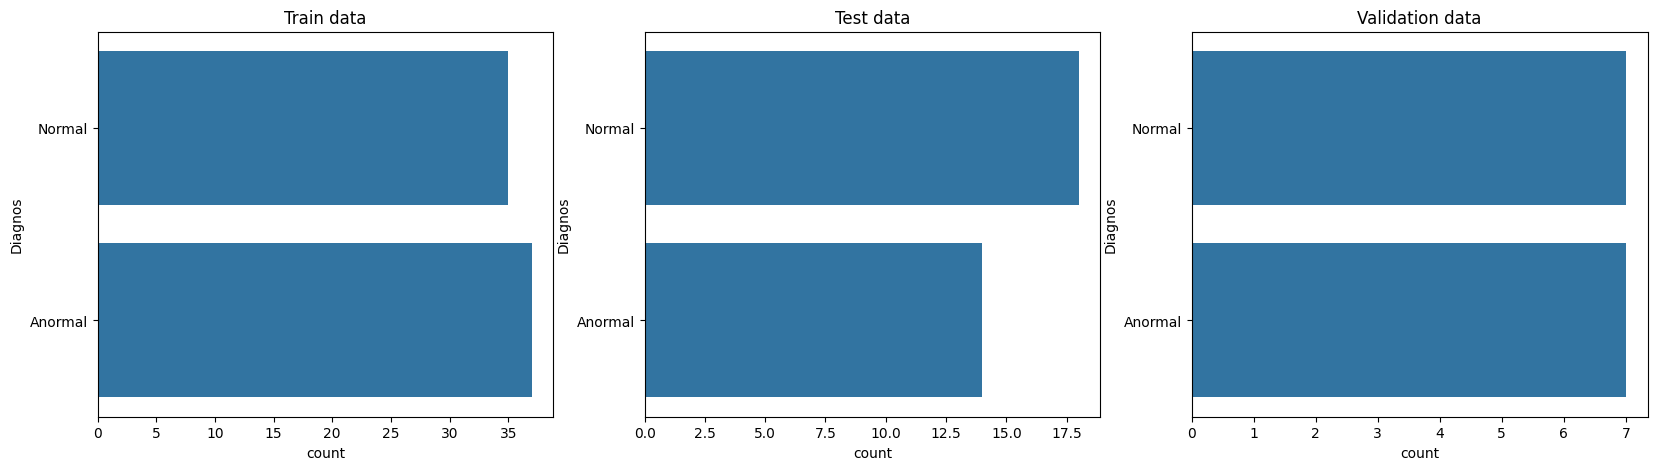

In [6]:
# plotting the Train, Test and Validation image data

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(train_df['Diagnos'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['Diagnos'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['Diagnos'])
plt.title('Validation data')

plt.show()

## Plotting raw images

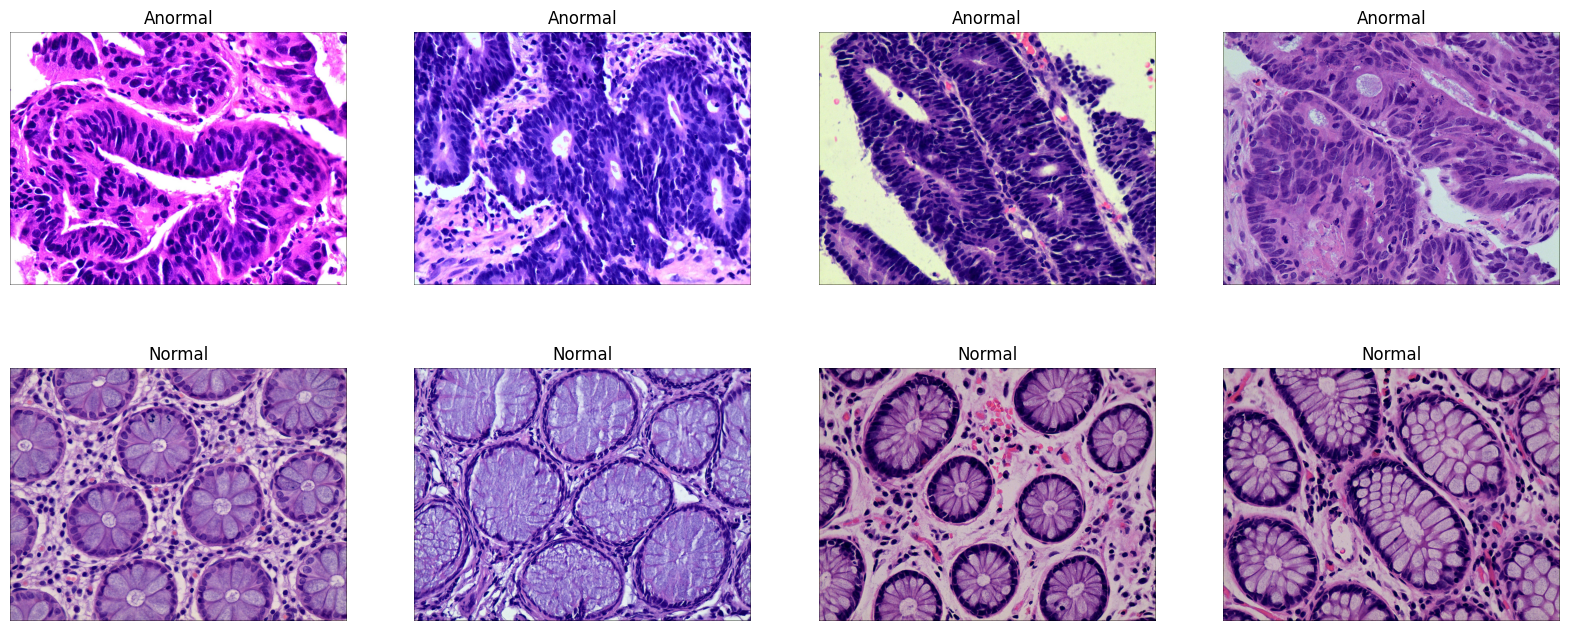

In [7]:
# Plotting raw images just for review

plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Anormal"][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Anormal')
    
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Normal"][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')

# 3. Preparing Data

### Preparing Traning Image Data

In [8]:
# Preparing Training image data (image array and class name) for processing

# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of VGG16 model to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        x.append(img) # appending image array
        y.append(train_class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


### Preparing Validation Image Data

In [9]:
# Preparing validation images data (image array and class name) for processing

# Declaring variables
val_images=[]
val_images_Original=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(val_folder):
    image_list=os.listdir(val_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_class_names.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [10]:
# Preparing validation images data (image array and class name) for processing

# Declaring variables
test_images=[]
test_images_Original=[]
test_image_label=[] # to store the labels of the images

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        test_images.append(img) # appending image array
        test_image_label.append(test_class_names.index(folder))
        
print("Preparing Test Dataset Completed.")

Preparing Test Dataset Completed.


### Verifying the dataset

In [11]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# ===========

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# ===========

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(72, 400, 400, 3)
(72, 2)
Test Dataset
(32, 400, 400, 3)
(32, 2)
Validation Dataset
(14, 400, 400, 3)
(14, 2)


# 5. Building a Model: Using Transfer Learning - VGG16 model

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. (Source: https://en.wikipedia.org/wiki/Transfer_learning)

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task which is related to original task.

It is quite popular in deep learning where pre-trained models are used as the starting point on Computer Vision (CV) and Natural Language Processing (NLP) tasks. This is very helpful approach as it saves lots of time, resoureses. This way one can avail benefit of using complex models developed by others as start point and on top of it develop another.

## Verify the default VGG16 model

In [12]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.



2023-10-17 21:23:12.054882: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-17 21:23:12.428273: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-17 21:23:12.587425: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

2023-10-17 21:23:16.149312: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


## **Observations:**
1. We want to carry weights as it was in original model, so we are carring weights = 'imagenet'
2. The very first layer is input layer which accept image size = (224, 224, 3). Our image size are different, so we need to change the parameter - image_size in the first layer. Our size will be: (224,224, 3)
3. We want to change the last layer as we have 10 class classificatoin problem. So, we will not include top layer
4. Also, we will not train all the layers except the last one as we will have to train that. So, we will set properties for trainable = False excet for the top i.e. last layer.

## Custom use VGG16 model (set input layer, remove last (top) layer)

In [13]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(img_width,img_height,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                 

**Observation:**

1. The first layer is having image size = (224,224,3) now as we defined.
1. Also, see the folloiwng 2 top (last) layers which were there in original VGG16 are now not the part of our customized layer because we set include_top=False:

flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   

## Setup last (top) custom layer

In [14]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
# dense1=layers.Dense(100,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                     

## Freeze all the layers except the last which we added

In [15]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                             

# 6. Train the Model

In [16]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


# 7. Compile the Model

In [17]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


# Another approach: Use ImageDataGenerator (we are NOT using this)

In [18]:
# # this experiment can also be done using ImageDataGenerator approach
# # As this approach gave me less accuracy, I choose approach of NOT using ImageDataGenerator

# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,           
#                                    shear_range = 0.2,          
#                                    zoom_range = 0.2,  
#                                    horizontal_flip = True)

# train_data = train_datagen.flow_from_directory(train_folder,                      
#                                                target_size = (img_width, img_height),      
#                                                batch_size = 128,
#                                                class_mode = 'categorical') 

# test_datagen = ImageDataGenerator(rescale = 1./255) 
# test_data = test_datagen.flow_from_directory(test_folder,
#                                             target_size = (img_width, img_height),
#                                             batch_size = 128,
#                                             class_mode = 'categorical')

# history = model.fit(train_data,validation_data=test_data,epochs=epochs)  

# # Above approach gives following output:
# Epoch 1/10
# 82/82 [==============================] - 110s 1s/step - loss: 0.2688 - accuracy: 0.8869 - val_loss: 0.2438 - val_accuracy: 0.9038
# Epoch 2/10
# 82/82 [==============================] - 107s 1s/step - loss: 0.1238 - accuracy: 0.9559 - val_loss: 0.2501 - val_accuracy: 0.9103
# Epoch 3/10
# 82/82 [==============================] - 106s 1s/step - loss: 0.1114 - accuracy: 0.9576 - val_loss: 0.2619 - val_accuracy: 0.9103
# Epoch 4/10
# 82/82 [==============================] - 104s 1s/step - loss: 0.1001 - accuracy: 0.9647 - val_loss: 0.2290 - val_accuracy: 0.9151
# Epoch 5/10
# 82/82 [==============================] - 105s 1s/step - loss: 0.0850 - accuracy: 0.9711 - val_loss: 0.2211 - val_accuracy: 0.9247
# Epoch 6/10
# 82/82 [==============================] - 103s 1s/step - loss: 0.0858 - accuracy: 0.9697 - val_loss: 0.2130 - val_accuracy: 0.9263
# Epoch 7/10
# 82/82 [==============================] - 104s 1s/step - loss: 0.0773 - accuracy: 0.9703 - val_loss: 0.2308 - val_accuracy: 0.9199
# Epoch 8/10
# 82/82 [==============================] - 104s 1s/step - loss: 0.0759 - accuracy: 0.9718 - val_loss: 0.2149 - val_accuracy: 0.9199
# Epoch 9/10
# 82/82 [==============================] - 103s 1s/step - loss: 0.0745 - accuracy: 0.9722 - val_loss: 0.4007 - val_accuracy: 0.8830
# Epoch 10/10
# 82/82 [==============================] - 104s 1s/step - loss: 0.0659 - accuracy: 0.9741 - val_loss: 0.3147 - val_accuracy: 0.8942


# 8. Fit the Model

In [19]:
# Fit the Model

model.fit(xtrain,ytrain,epochs=epochs,batch_size=batch_size,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/10


2023-10-17 21:23:20.180183: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2334720000 exceeds 10% of free system memory.


1/1 [==============================] - 102s 102s/step - loss: 6.7754 - accuracy: 0.5614 - val_loss: 47.9238 - val_accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 100s 100s/step - loss: 34.1537 - accuracy: 0.5088 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 106s 106s/step - loss: 0.6766 - accuracy: 0.9649 - val_loss: 6.7716 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 93s 93s/step - loss: 2.4796 - accuracy: 0.9298 - val_loss: 13.9430 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 141s 141s/step - loss: 2.9203 - accuracy: 0.9298 - val_loss: 14.4468 - val_accuracy: 0.7333
Epoch 6/10
1/1 [==============================] - 138s 138s/step - loss: 0.9422 - accuracy: 0.9298 - val_loss: 10.5602 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 122s 122s/step - loss: 6.2488e-05 - accuracy: 1.0000 - val_loss: 7.2282 - val_accuracy: 0.8000
Epoch 8/10
1/1 [=

In [20]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(img_width,img_height))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
#     plt.imshow(img.astype('int32'))
#     plt.show()
    prediction=model.predict(img.reshape(1,img_width,img_height,3))
    output=np.argmax(prediction)
    print(train_class_names[output] + ": " + Get_Xray_Type(train_class_names[output]))
#     print(train_class_names[output])
#     print(class_names_actual[output])
    
    

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    
#     predicted_class=val_class_names[predicted_label]
#     true_class=val_class_names[true_label]
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(str(Get_Xray_Type(val_class_names[predicted_label])), 100*np.max(predictions_array), str(Get_Xray_Type(val_class_names[true_label])), color=color, horizontalalignment='left'))
#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# 10. Predictions

In [21]:
# Preparing prediction arrary
val_predictions=[]

for img in val_images:
    img=img.reshape(1,img_width,img_height,3)
    val_predictions.append(model.predict(img))
    
test_predictions=[]

for img in test_images:
    img=img.reshape(1,img_width,img_height,3)
    test_predictions.append(model.predict(img))

1/1 [==============================] - 1s 1s/step


In [22]:
# Prediction of individual images taken from internet

# !wget -q https://prod-images-static.radiopaedia.org/images/25074651/ec1fa7072de87da7445f43ad54a784_jumbo.jpeg
predict('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg') 

# white_headed_capuchin
# !wget -q https://drbeeneducation.files.wordpress.com/2016/09/posteriorv1-v11.png?resize=1113%2C886
predict('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person108_bacteria_506.jpeg') 
    
# japanese_macaque
# !wget -q https://hongkongliving.com/wp-content/uploads/2019/06/Monkey-Hill.jpg
predict('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg')

# patas_monkey
# !wget -q https://sambadenglish.com/wp-content/uploads/2019/05/Nilgiri-langur-1024x683.jpg
predict('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg')


# call the function

# defining parameters to pass to function
i=random.randrange(1,10) # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images" 
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,val_predictions, val_image_label, val_images_Original) 
plt.subplot(1,2,2)
plot_value_array(i, val_predictions, val_image_label)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'

In [ ]:
# Prediction on Test images

# Declaring variables
num_rows=4
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of Test Chest X-ray into Normal and Pneumonia using Transfer Learning (VGG16)\n")
print("Predicted Diagnose, Percentage, (Original Diagnose)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     ii=random.randrange(1,227)
    # we are passing "val_images_Original" just to show original image instead of "val_images" 
    # which is preprocessed as VGG16 process and used for prediction.
    indexer=random.randrange(1,624)
    plot_image(indexer,test_predictions, test_image_label, test_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(indexer, test_predictions, test_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Prediction on Validation images

# Declaring variables
num_rows=4
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of Chest X-ray into Normal and Pneumonia using Transfer Learning (VGG16)\n")
print("Predicted Species, Percentage, (Original Species)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     ii=random.randrange(1,227)
    # we are passing "val_images_Original" just to show original image instead of "val_images" 
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(i,val_predictions, val_image_label, val_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, val_predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
print("Future tasks: 1. Image distribution correction 2. Creating confusion matrix and 3. Looking for F1 score\n")

print("Notebook completed.")